# Uploading Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import imblearn

# EDA

In [2]:
card_data = pd.read_csv('card_transdata.csv')
card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
card_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
card_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
card_data.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [6]:
card_data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [7]:
card_data['online_order'].value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

In [8]:
card_data['repeat_retailer'].value_counts()

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

In [9]:
card_data['used_chip'].value_counts()

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

In [10]:
card_data['used_pin_number'].value_counts()

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

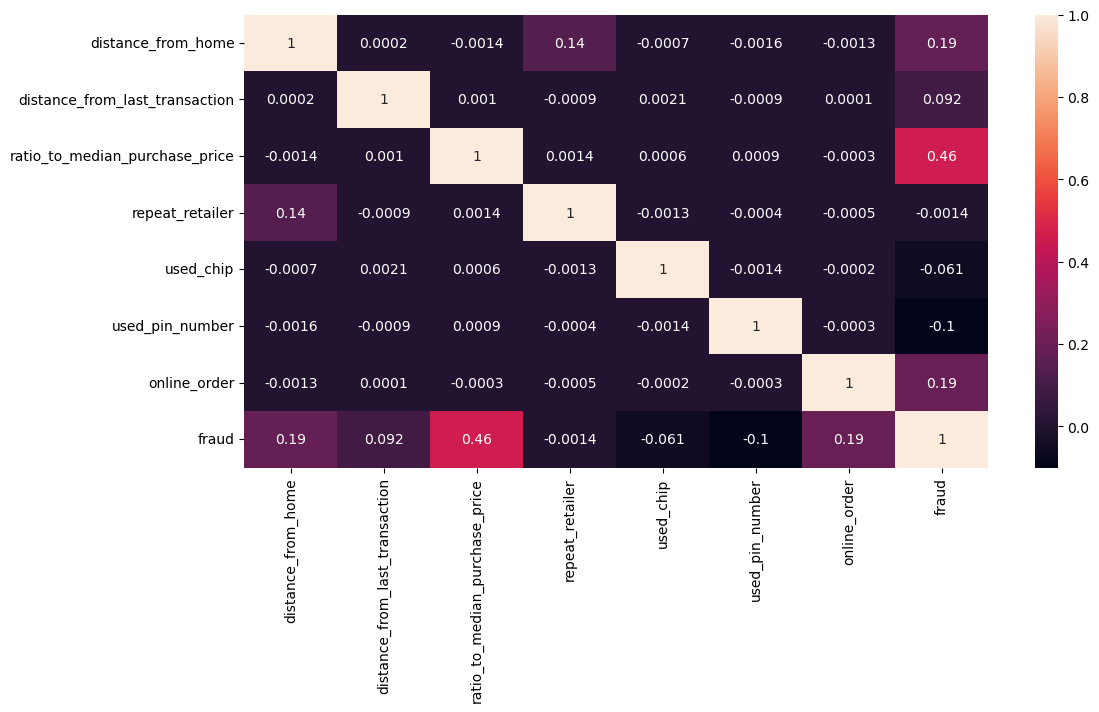

In [11]:
from matplotlib.pyplot import figure  #to increase the size of the plot
figure(figsize=(12, 6), dpi=100)
corr_matrix=round(card_data.corr(),4) #correlation matrix rounded off to 3 decimals
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Checking for outliers


In [12]:
Upper_limit = card_data['distance_from_home'].mean() + 3*card_data['distance_from_home'].std()
Lower_limit = card_data['distance_from_home'].mean() - 3*card_data['distance_from_home'].std()

In [13]:
new_df = card_data[(card_data['distance_from_home'] < Upper_limit) & (card_data['distance_from_home'] > Lower_limit)]


In [14]:
Upper_limit = new_df['distance_from_last_transaction'].mean() + 3*new_df['distance_from_last_transaction'].std()
Lower_limit = new_df['distance_from_last_transaction'].mean() - 3*new_df['distance_from_last_transaction'].std()

In [15]:
n_df = new_df[(new_df['distance_from_last_transaction'] < Upper_limit) & (new_df['distance_from_last_transaction'] > Lower_limit)]

In [16]:
Upper_limit = n_df['ratio_to_median_purchase_price'].mean() + 3*n_df['ratio_to_median_purchase_price'].std()
Lower_limit = n_df['ratio_to_median_purchase_price'].mean() - 3*n_df['ratio_to_median_purchase_price'].std()

In [17]:
final_df = n_df[(n_df['ratio_to_median_purchase_price'] < Upper_limit) & (n_df['ratio_to_median_purchase_price'] > Lower_limit)]
final_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000
mean,21.396471,3.767034,1.570861,0.879940,0.350386,0.100661,0.650536,0.070263
std,31.150676,8.234314,1.683858,0.325032,0.477091,0.300880,0.476801,0.255589
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.818765,0.293525,0.468635,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.731577,0.982961,0.974703,1.000000,0.000000,0.000000,1.000000,0.000000
75%,24.623661,3.256162,2.006759,1.000000,1.000000,0.000000,1.000000,0.000000
max,222.768105,82.820782,10.231313,1.000000,1.000000,1.000000,1.000000,1.000000


# Multicollinearity Test

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = final_df.drop('fraud',axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
  
print(vif_data)

                          feature       VIF
0              distance_from_home  1.562115
1  distance_from_last_transaction  1.187847
2  ratio_to_median_purchase_price  1.734600
3                 repeat_retailer  3.756151
4                       used_chip  1.468878
5                 used_pin_number  1.101444
6                    online_order  2.413631


# Visualizations

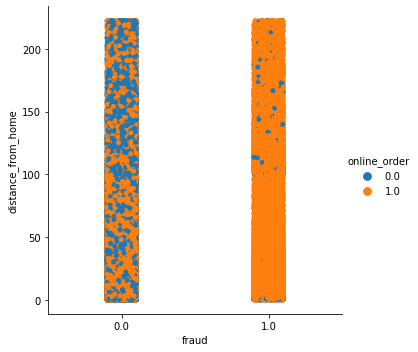

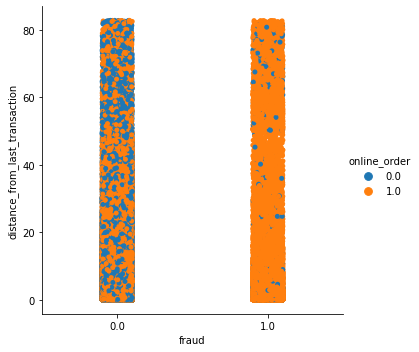

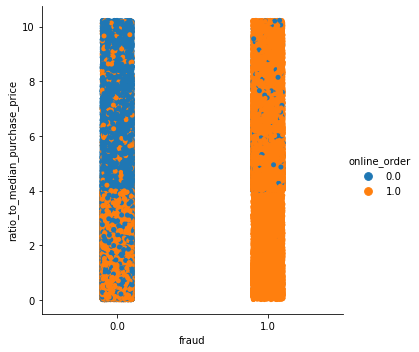

In [19]:
sns.catplot(x='fraud', y='distance_from_home',hue='online_order', data = final_df)
sns.catplot(x='fraud', y='distance_from_last_transaction',hue='online_order', data = final_df)
sns.catplot(x='fraud', y='ratio_to_median_purchase_price',hue='online_order', data = final_df)

In [20]:
online_data = final_df[final_df['online_order']==1]
online_data['fraud'].value_counts()

0.0    562034
1.0     64433
Name: fraud, dtype: int64

In [21]:
non_online_data = final_df[final_df['online_order']==0]
non_online_data['fraud'].value_counts()

0.0    333304
1.0      3230
Name: fraud, dtype: int64

In [22]:
percent_of_online_frauds = 64433/(64433+3230);
print(round(100*percent_of_online_frauds,2),'% of frauds occur when it is an online order')

95.23 % of frauds occur when it is an online order


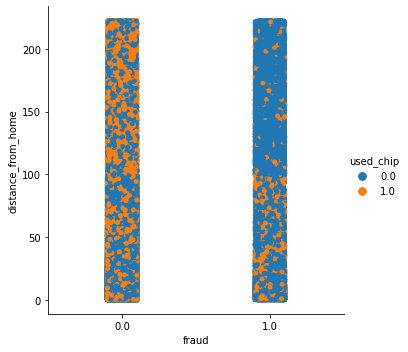

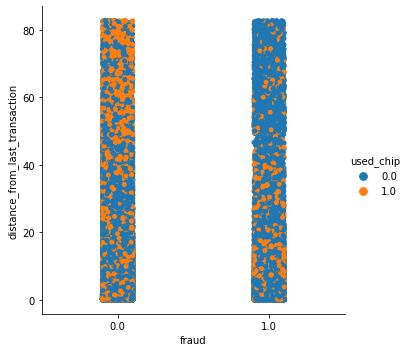

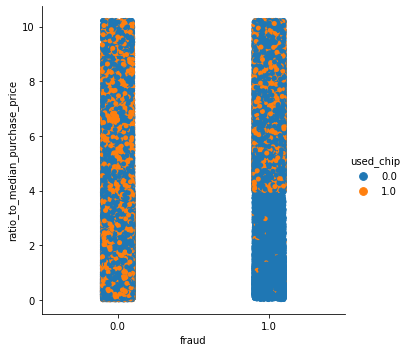

In [23]:
sns.catplot(x='fraud', y='distance_from_home',hue='used_chip', data = final_df)
sns.catplot(x='fraud', y='distance_from_last_transaction',hue='used_chip', data = final_df)
sns.catplot(x='fraud', y='ratio_to_median_purchase_price',hue='used_chip', data = final_df)

# Running Logistic Regression

In [24]:
X = final_df.drop('fraud',axis=1)
y = final_df.fraud

In [25]:
#Scaling features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']] = min_max_scaler.fit_transform(X[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']])
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000,963001.000000
mean,0.096028,0.045483,0.153171,0.879940,0.350386,0.100661,0.650536
std,0.139838,0.099423,0.164650,0.325032,0.477091,0.300880,0.476801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017121,0.003543,0.045394,1.000000,0.000000,0.000000,0.000000
50%,0.043664,0.011867,0.094878,1.000000,0.000000,0.000000,1.000000
75%,0.110515,0.039314,0.195793,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.cluster import KMeans
features = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]
kmeans = KMeans(n_clusters = 10,n_init=10,random_state=0)
X["Cluster"] = kmeans.fit_predict(X)

In [27]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,Cluster
0,0.259796,0.003755,0.189846,1.0,1.0,0.0,0.0,1
1,0.048595,0.002119,0.126120,1.0,0.0,0.0,0.0,4
2,0.022832,0.009720,0.041392,1.0,0.0,0.0,1.0,2
3,0.010068,0.067615,0.035031,1.0,1.0,0.0,1.0,3
4,0.198354,0.006838,0.216915,1.0,1.0,0.0,1.0,3


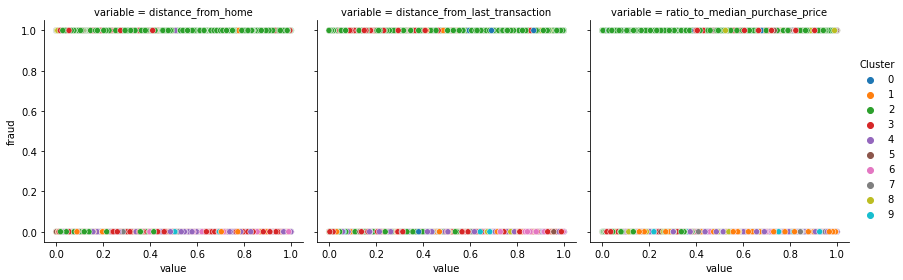

In [28]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["fraud"] = y
sns.relplot(
    x="value", y="fraud", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["fraud", "Cluster"],
    ),
);

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [31]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
ans = ('Accuracy of the model is approximately %0.2f%%')
print(ans%(accuracy_percentage))

Accuracy of the model is approximately 97.23%


Text(33.0, 0.5, 'Actual')

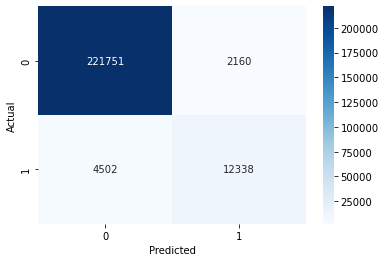

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    223911
         1.0       0.85      0.73      0.79     16840

    accuracy                           0.97    240751
   macro avg       0.92      0.86      0.89    240751
weighted avg       0.97      0.97      0.97    240751



Text(0.5, 1.0, 'ROC curve for Logitstic Regression AUC: 0.86)')

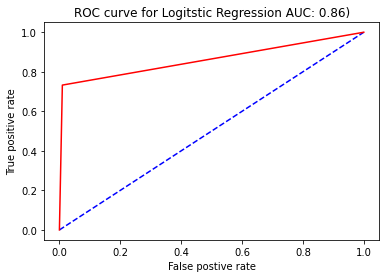

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr1,tpr1,threshold1 = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.plot(fpr1,tpr1,color='red')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
auc_score1=roc_auc_score(y_test,y_pred)
plt.title('ROC curve for Logitstic Regression AUC: {0:.2f})'.format(auc_score1))

In [36]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.168798
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               963001
Model:                          Logit   Df Residuals:                   962993
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.3363
Time:                        14:57:56   Log-Likelihood:            -1.6255e+05
converged:                       True   LL-Null:                   -2.4491e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 5.3413      0.026    208.417    

# Using SMOTE oversamping technique

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [38]:
model.fit(X_res,y_res)
y_res_pred = model.predict(X_test)

In [39]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_res_pred)
accuracy_percentage = 100 * accuracy
ans = ('Accuracy of the model is approximately %0.2f%%')
print(ans%(accuracy_percentage))

Accuracy of the model is approximately 94.27%


Text(33.0, 0.5, 'Actual')

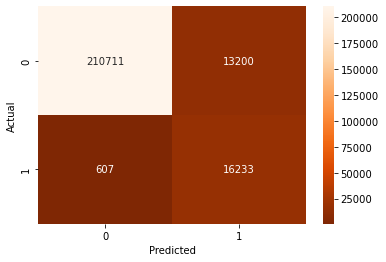

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test,y_res_pred)
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
print(classification_report(y_test,y_res_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    223911
         1.0       0.55      0.96      0.70     16840

    accuracy                           0.94    240751
   macro avg       0.77      0.95      0.83    240751
weighted avg       0.97      0.94      0.95    240751



Text(0.5, 1.0, 'ROC curve for Logitstic Regression AUC: 0.95)')

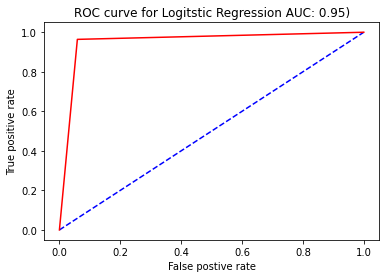

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr1,tpr1,threshold1 = roc_curve(y_test,y_res_pred)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.plot(fpr1,tpr1,color='red')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
auc_score1=roc_auc_score(y_test,y_res_pred)
plt.title('ROC curve for Logitstic Regression AUC: {0:.2f})'.format(auc_score1))

In [43]:
logit_model=sm.Logit(y_res,X_res)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.234745
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1342854
Model:                          Logit   Df Residuals:                  1342846
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                  0.6613
Time:                        14:58:01   Log-Likelihood:            -3.1523e+05
converged:                       True   LL-Null:                   -9.3080e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 8.4421      0.021    400.405     